In [7]:
import pandas as pd
import seaborn as sns

In [8]:
#Loading the Dataset
dataset = pd.read_csv('cleaned_final_data.csv')
dataset

Unnamed: 0    tt      date        dt         db         freq  \
0           187  2003  20210420  0.179741 -11.456897  1379.543103   
1           185  1147  20210420  0.381513 -16.596639  1493.764706   
2           184  1702  20210420  0.139944 -12.810056  1449.164804   
3           188  2035  20210420  0.192593 -11.592593  1340.518519   
4           189  1435  20210420  0.076531 -13.918367  1595.153061   
..          ...   ...       ...       ...        ...          ...   
501         462   929  20240305  0.058273 -13.258993  1633.971223   
502         466  1404  20240307  0.347674 -12.523256  1430.720930   
503         467  1351  20240307  0.242400 -12.784000  1462.256000   
504         474  1732  20240315  0.149640 -13.611511  1323.546763   
505         475  1725  20240315  0.173016 -12.560847  1465.925926   

     day_or_night  weather  power  band  pos_towers  average_distance  
0               0        0    7.0    40           1       1351.000000  
1               1        0   10.0    20          13       1430.076923  
2               1        0    NaN    40           0               NaN  
3               0        0    7.0    20           1       1802.000000  
4               1        0    NaN    20           0               NaN  
..            ...      ...    ...   ...         ...               ...  
501             0        0    9.0    20           5       2633.200000  
502             1        0   10.0    40          38        488.473684  
503             1        0   10.0    20          53       1096.000000  
504             1        0    6.0    40          21        497.380952  
505             1        0    6.0    20           5       1266.000000  

[506 rows x 12 columns]

In [9]:
# function to calculate yactual from No.of pos Towers
def Y_actual_np(avg , np): #(%)
    #np-> no. of pos towers
    #avg-> average no. of pos towers 
    numerator = (np-avg)
    denominator = (np+avg)
    fraction = numerator/denominator
    return fraction*100

# function to calculate yactual from avg_distance
def Y_actual_dist(avg , dist): #(%)
    #dist -:> avrgage distance of one transmission
    #avg-> average value of all values combined
    numerator = (dist-avg)
    denominator = (dist+avg)
    fraction = numerator/denominator
    return fraction*100

# finding mean / Threshold / avg
np_mean = float(dataset[['pos_towers']].mean())
dist_mean = float(dataset[['average_distance']].mean())

/tmp/ipykernel_33/1327799524.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  np_mean = float(dataset[['pos_towers']].mean())
/tmp/ipykernel_33/1327799524.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dist_mean = float(dataset[['average_distance']].mean())


In [10]:
# converting time to time segment
def convert_time_to_segment(time_str):
    '''
0-8 - 0
8-16 - 1
16-24 - 2
'''
    # Extract the hour part from the time string
    
    if ( len(time_str.split('.')[0])<=3 ):    #The time string "13:45" has a length greater than 3 characters before the decimal, so it extracts the first two characters: "13"
        hour = int(time_str[0])
    else:
        hour = int(time_str[0]+time_str[1])
    
    # Determine the segment based on the hour
    if 0 <= hour < 8:
        segment = 0
    elif 8 <= hour < 16:
        segment = 1
    elif 16 <= hour < 24:
        segment = 2
    return segment

In [11]:
#new and final data set for model
new_dataset = {
    'time_segment':[],
    'dt':[],
    'db':[],
    'freq':[],
    'day_or_night':[],
    'band':[],
    'power':[],
    'Y_Actual_no_of_towers':[],
    'Y_Actual_avg_distance':[],
}

#to make new dataset, looping over all the entries in our dataset
for index,rows in dataset.iterrows():
    
    # calling and calculating y_actuals
    y_np = Y_actual_np(np_mean , rows['pos_towers'])   #loops on all rows
    y_dist = Y_actual_dist(dist_mean ,rows['average_distance'])   #loops on all rows
    
    #appending the value in the dataset
    
    #getting time segment
    time = str(rows['tt'])   #retrieves the time value from the current row in the dataset and convert value in string
    time = convert_time_to_segment(time)   #function that takes the time string and converts it into a time segment.
    new_dataset['time_segment'].append(time)
    
    #new_dataset['date'].append(rows['date'])
    new_dataset['dt'].append(rows['dt'])
    new_dataset['db'].append(rows['db'])
    new_dataset['freq'].append(rows['freq'])
    new_dataset['day_or_night'].append(rows['day_or_night'])
    new_dataset['power'].append(rows['power'])
    new_dataset['band'].append(rows['band'])
#     new_dataset['pos_towers'].append(rows['pos_towers'])
#     new_dataset['average_distance'].append(rows['average_distance'])
    new_dataset['Y_Actual_no_of_towers'].append(y_np)
    
    new_dataset['Y_Actual_avg_distance'].append(y_dist)

In [12]:
df_dataset = pd.DataFrame(new_dataset)
df_dataset

#Result
# The given Transmission is {Y_Actual_no_of_towers} % more successful then the base transmission
# The given Transmission is {Y_Actual_avg_distance} % more successful then the base transmission


time_segment        dt         db         freq  day_or_night  band  \
0               2  0.179741 -11.456897  1379.543103           0.0  40.0   
1               1  0.381513 -16.596639  1493.764706           1.0  20.0   
2               2  0.139944 -12.810056  1449.164804           1.0  40.0   
3               2  0.192593 -11.592593  1340.518519           0.0  20.0   
4               1  0.076531 -13.918367  1595.153061           1.0  20.0   
..            ...       ...        ...          ...           ...   ...   
501             1  0.058273 -13.258993  1633.971223           0.0  20.0   
502             1  0.347674 -12.523256  1430.720930           1.0  40.0   
503             1  0.242400 -12.784000  1462.256000           1.0  20.0   
504             2  0.149640 -13.611511  1323.546763           1.0  40.0   
505             2  0.173016 -12.560847  1465.925926           1.0  20.0   

     power  Y_Actual_no_of_towers  Y_Actual_avg_distance  
0      7.0             -84.518892              14.014109  
1     10.0               4.338171              16.790595  
2      NaN            -100.000000                    NaN  
3      7.0             -84.518892              27.761453  
4      NaN            -100.000000                    NaN  
..     ...                    ...                    ...  
501    9.0             -40.894755              44.202672  
502   10.0              52.246724             -35.188005  
503   10.0              63.280465               3.646438  
504    6.0              27.586000             -34.393845  
505    6.0             -40.894755              10.815345  

[506 rows x 9 columns]

In [13]:
df_dataset.describe()

time_segment          dt          db         freq  day_or_night  \
count    506.000000  506.000000  506.000000   506.000000    506.000000   
mean       1.316206    0.133812  -13.470648  1452.868905      0.824111   
std        0.498328    0.163499    1.973003   172.014814      0.381103   
min        0.000000   -1.300000  -20.000000   522.500000      0.000000   
25%        1.000000    0.076048  -14.673070  1363.225452      1.000000   
50%        1.000000    0.139567  -13.248494  1461.913818      1.000000   
75%        2.000000    0.204302  -12.110651  1539.831654      1.000000   
max        2.000000    0.585714   -8.413681  2425.000000      1.000000   

             band       power  Y_Actual_no_of_towers  Y_Actual_avg_distance  
count  506.000000  480.000000             506.000000             480.000000  
mean    29.994071    7.306250             -16.680689              -6.166585  
std     10.016717    1.698569              42.823504              25.308563  
min     17.000000    5.000000            -100.000000             -99.023325  
25%     20.000000    6.000000             -49.745500             -27.140129  
50%     30.000000    7.000000             -13.953708              -5.532427  
75%     40.000000    9.000000              17.569876              15.771530  
max     40.000000   10.000000              66.854442              52.431832

*max of y_act-towers* = best transmission(from 506 transmissions) is 66.8% more successful than base transmission.
*min of y_act-towers* = worst transmission is 100% less successful than base transmission.

*max of db* = what's the maximum value that db column holds for best transmission (lowest snr ratio)

<Axes: >

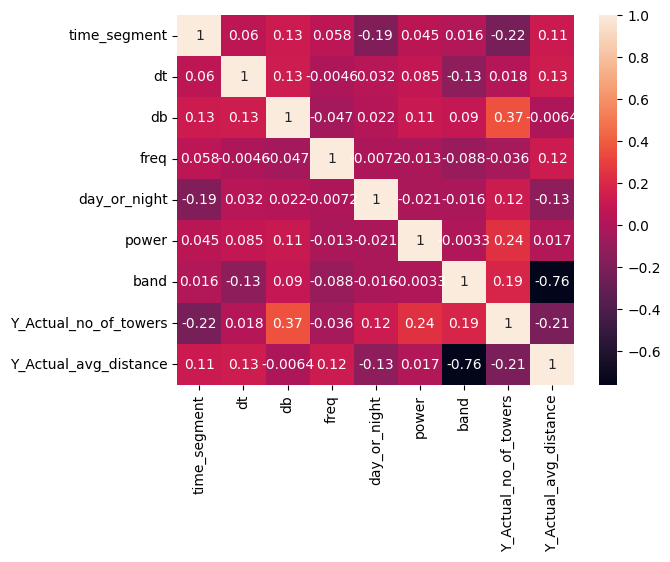

In [14]:
df_corr = df_dataset[['time_segment','dt' , 'db' , 'freq' , 
                       'day_or_night' , 'power' , 'band' , 'Y_Actual_no_of_towers' , 'Y_Actual_avg_distance']].corr()
sns.heatmap(df_corr , annot=True)

**Correlations with Y_Actual_no_of_towers:
**db: 0.37 (Moderate positive correlation)
power: 0.24 (Weak positive correlation)
band: 0.19 (Weak positive correlation)
time_segment: -0.22 (Weak negative correlation)
day_or_night: 0.12 (No significant correlation)
dt: 0.018 (No significant correlation)
freq: -0.036 (No significant correlation)
Y_Actual_avg_distance:

Correlations with Y_Actual_avg_distance:
band: -0.76 (Strong negative correlation)
time_segment: 0.11 (No significant correlation)
db: 0.13 (No significant correlation)
freq: 0.12 (No significant correlation)
power: 0.017 (No significant correlation)
day_or_night: -0.13 (No significant correlation)
dt: -0.0064 (No significant correlation)

> Insights:
> Y_Actual_no_of_towers has a moderate positive correlation with db (0.37), suggesting that as db increases, the number of towers tends to increase.
Y_Actual_no_of_towers has a weak positive correlation with power (0.24) and band (0.19).
Y_Actual_no_of_towers has a weak negative correlation with time_segment (-0.22).
Y_Actual_avg_distance has a strong negative correlation with band (-0.76), indicating that as the band value increases, the average distance decreases significantly.
Other variables show weak or no significant correlations with both Y_Actual_no_of_towers and Y_Actual_avg_distance.


# **ML Model 1 - Linear Regression Models**

**A- for Y_Actual_no_of_towers(%)**

Training Metrics:
MAE: 29.63654173806339
MSE: 1291.750998963805
R2: 0.2854086312830696

Testing Metrics:
MAE: 32.67866379371572
MSE: 1504.555142977808
R2: 0.21609353077742144



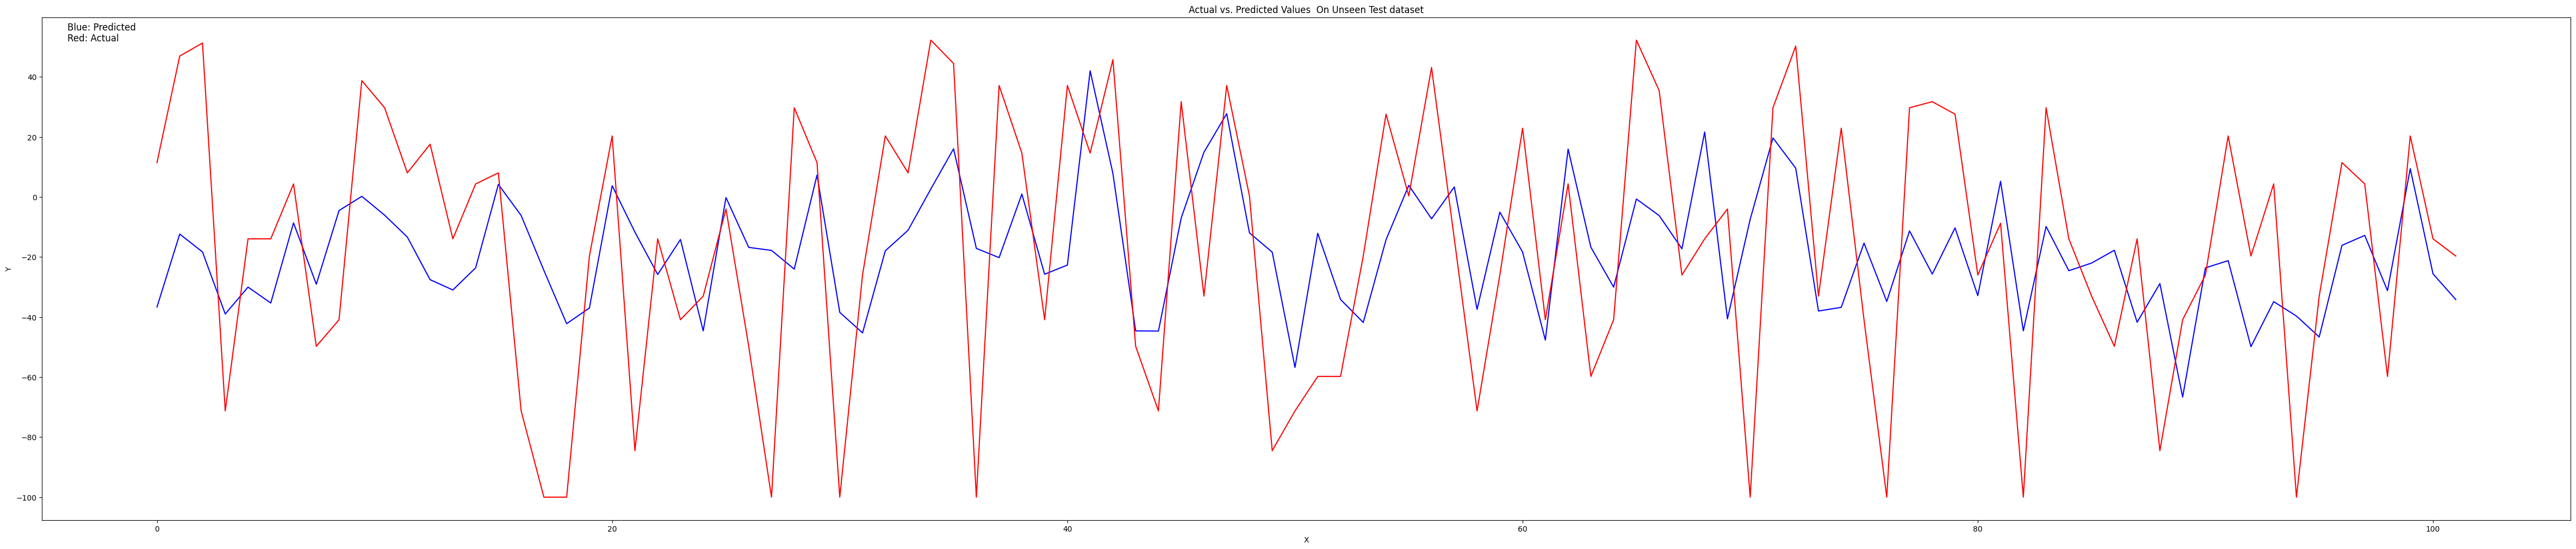

In [15]:
#M-1-a -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_no_of_towers(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with that column's averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)   # X = attributes of pre only, which are input
X = X.drop('Y_Actual_avg_distance' , axis=1)   # X = attributes of pre only, which are input
y = df['Y_Actual_no_of_towers']

# Split the data into training and testing sets
#code splits the dataset into training and testing sets, with 20% of the data used for testing and 80% for training, ensuring reproducibility with a fixed random seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model_regression_sm1 = LinearRegression()
#training the model
model_regression_sm1.fit(X_train, y_train)

#prediction of model on test data (X_Test , Y_Test)
y_predict = model_regression_sm1.predict(X_test)

# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values  On Unseen Test dataset')
#plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Model Line')
#ploting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Model Line')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)


# Calculate metrics
y_train_pred = model_regression_sm1.predict(X_train)
y_test_pred = model_regression_sm1.predict(X_test)

#Calculation of matrices
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")




FINDINGS:


Alignment:
In some segments, the blue line closely follows the red line, indicating accurate predictions.
In other segments, there are noticeable deviations between the blue and red lines, indicating areas where the predictions are less accurate.


Overall Trend:
The overall trend and patterns of the predicted values generally mirror those of the actual values, suggesting that the model captures the main features of the data but may struggle with specific fluctuations or noise.


The model performs moderately on the training data but shows decreased performance on the testing data. This is evident from the increase in MAE and MSE and the decrease in R2 from training to testing.

The gap between the training and testing metrics, particularly the R2 scores, suggests potential overfitting.

The MAE and MSE values indicate that the model has room for improvement in reducing prediction errors. The higher MSE compared to MAE in both datasets suggests that there are some predictions with large errors.

**# MAE (Mean Absolute Error): The average absolute difference between predicted and actual values, indicating the model's average prediction error.**

**MSE (Mean Squared Error): The average squared difference between predicted and actual values, emphasizing larger errors more than MAE.**

**# R2 (R-squared): The proportion of variance in the dependent variable that is predictable from the independent variables, with 1 being a perfect fit and 0 indicating no explanatory power.**

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_test)

**B- for Y_Actual_avg_distance(%)**

Training Metrics:
MAE: 11.90482931166584
MSE: 264.06427619010594
R2: 0.5717890643758581

Testing Metrics:
MAE: 12.36186211276035
MSE: 223.91425181134437
R2: 0.598158576535152



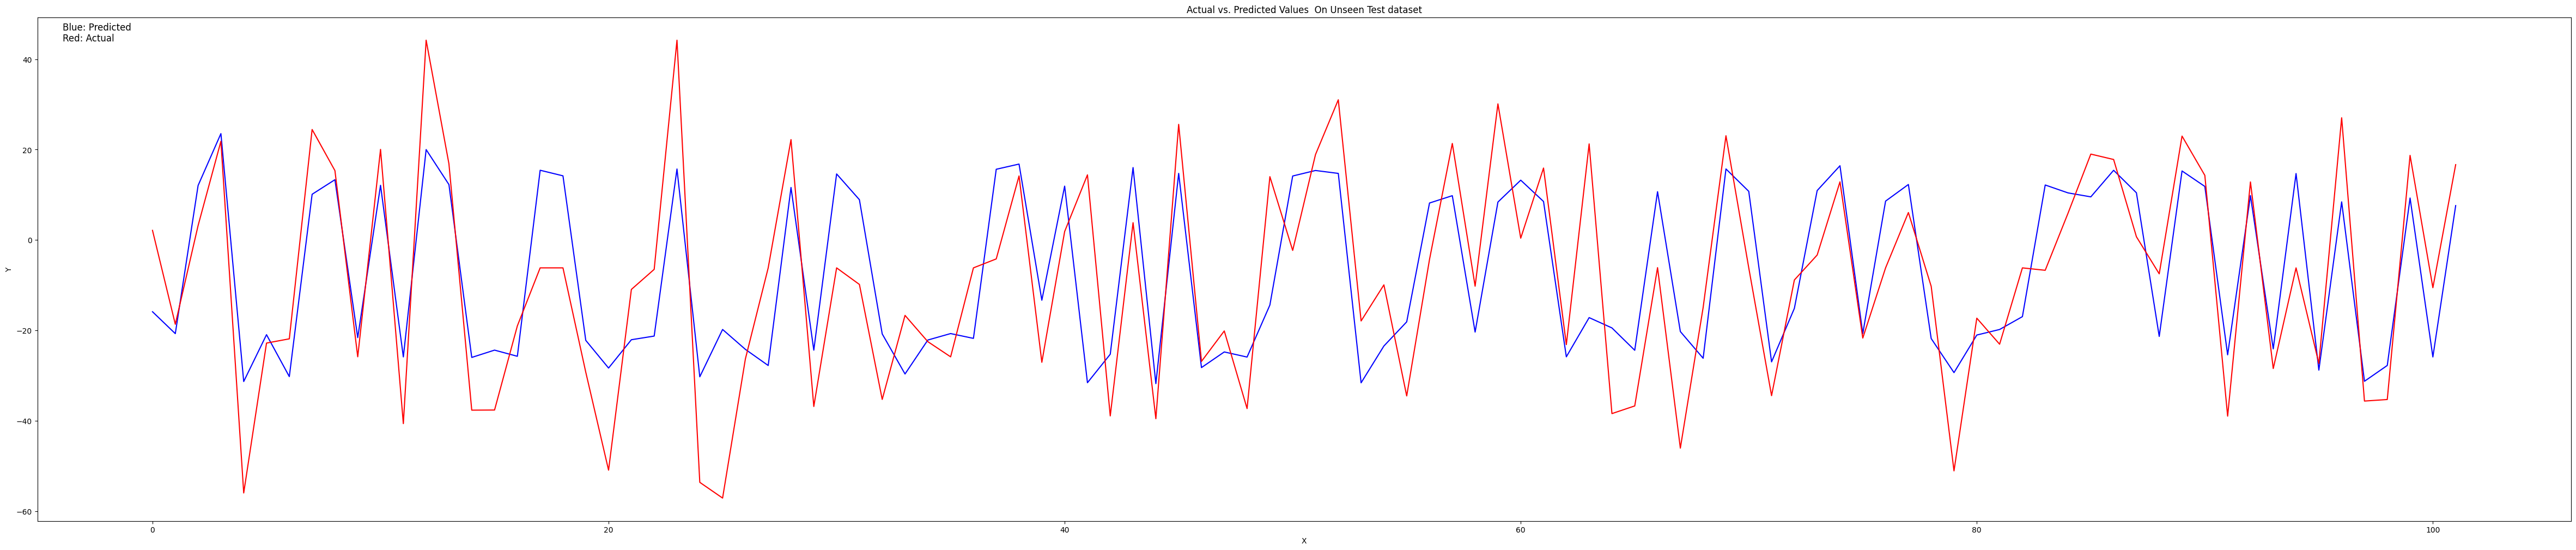

In [17]:
#M-1-b -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_avg_distance(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance' , axis=1)
y = df['Y_Actual_avg_distance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model_regression_sm2 = LinearRegression()
#Training the Model
model_regression_sm2.fit(X_train, y_train)


# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values  On Unseen Test dataset')
y_pred = model_regression_sm2.predict(X_test)
plt.plot(range(len(y_pred)), y_pred, color='blue', label='Model Line')
plt.plot(range(len(y_test)), y_test, color='red', label='Model Line')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)


# Calculate metrics
y_train_pred = model_regression_sm2.predict(X_train)
y_test_pred = model_regression_sm2.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)  #Measures the average absolute difference between the true values (y_train) and the predicted values (y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")




The model performs consistently on both training and testing data, with similar MAE and R2 values, suggesting good generalization and a balanced fit without significant overfitting. The MSE values, while higher than MAE, show that the model's larger errors are reasonably controlled.

In [18]:
#Example
X_new = pd.DataFrame({'time_segment': [3],
 'dt': [0.097727],
 'db': [0.903409],
 'freq': [1506.0],
 'day_or_night':[0.0],
 'band': [40.0],
 'power':[12.0]})
y_pred = model_regression_sm1.predict(X_new)
y_pred[0]

#shows result is coming 85% above base transmission/threshold

85.03465815630597

# **ML Model-2 Support Vector Regression Model**

**A- for Y_Actual_no_of_towers(%)**

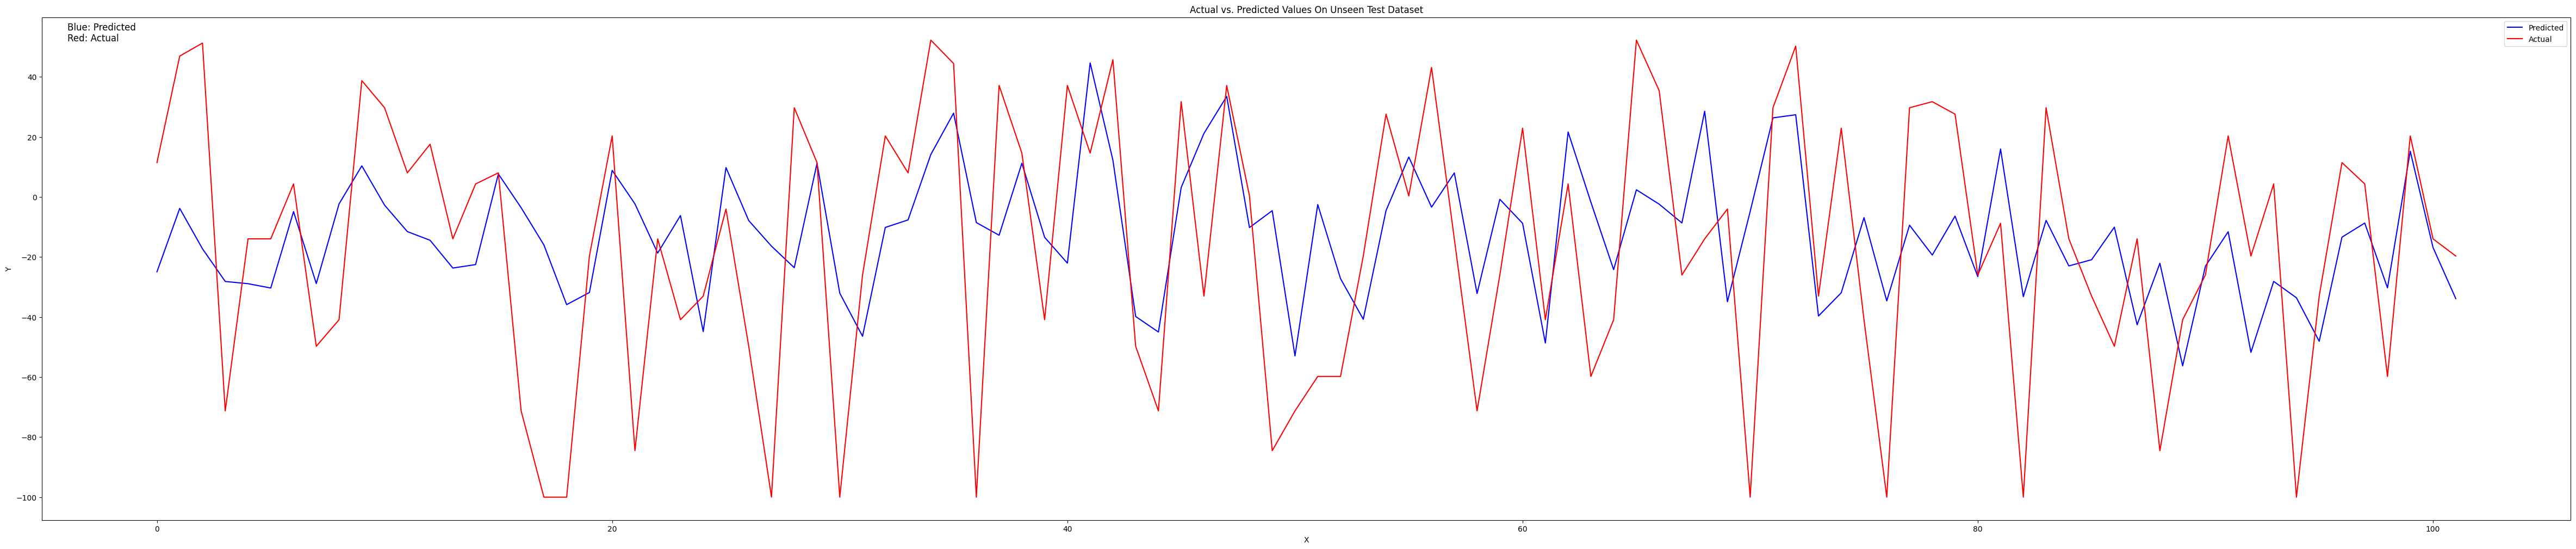

Training Metrics:
MAE: 29.45768985770229
MSE: 1332.4105945581134
R2: 0.2629159093184491

Testing Metrics:
MAE: 32.36945504144309
MSE: 1553.6750648209108
R2: 0.1905009663039744



In [19]:
#M-2-a -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_no_of_towers(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop(['Y_Actual_no_of_towers', 'Y_Actual_avg_distance'], axis=1)
y = df['Y_Actual_no_of_towers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define the model
model_svr_sm1 = SVR(kernel='linear')
# Train the support vector regression model
model_svr_sm1.fit(X_train, y_train)

# Prediction of model on test data
y_predict = model_svr_sm1.predict(X_test)

# Plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test Dataset')
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

plt.legend()
plt.show()

# Calculate metrics
y_train_pred = model_svr_sm1.predict(X_train)
y_test_pred = model_svr_sm1.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model shows moderate performance on both training and testing data, with higher errors and lower R2 scores indicating room for improvement. The discrepancies between the training and testing metrics suggest potential overfitting.

**B- for Y_Actual_avg_distance(%)**

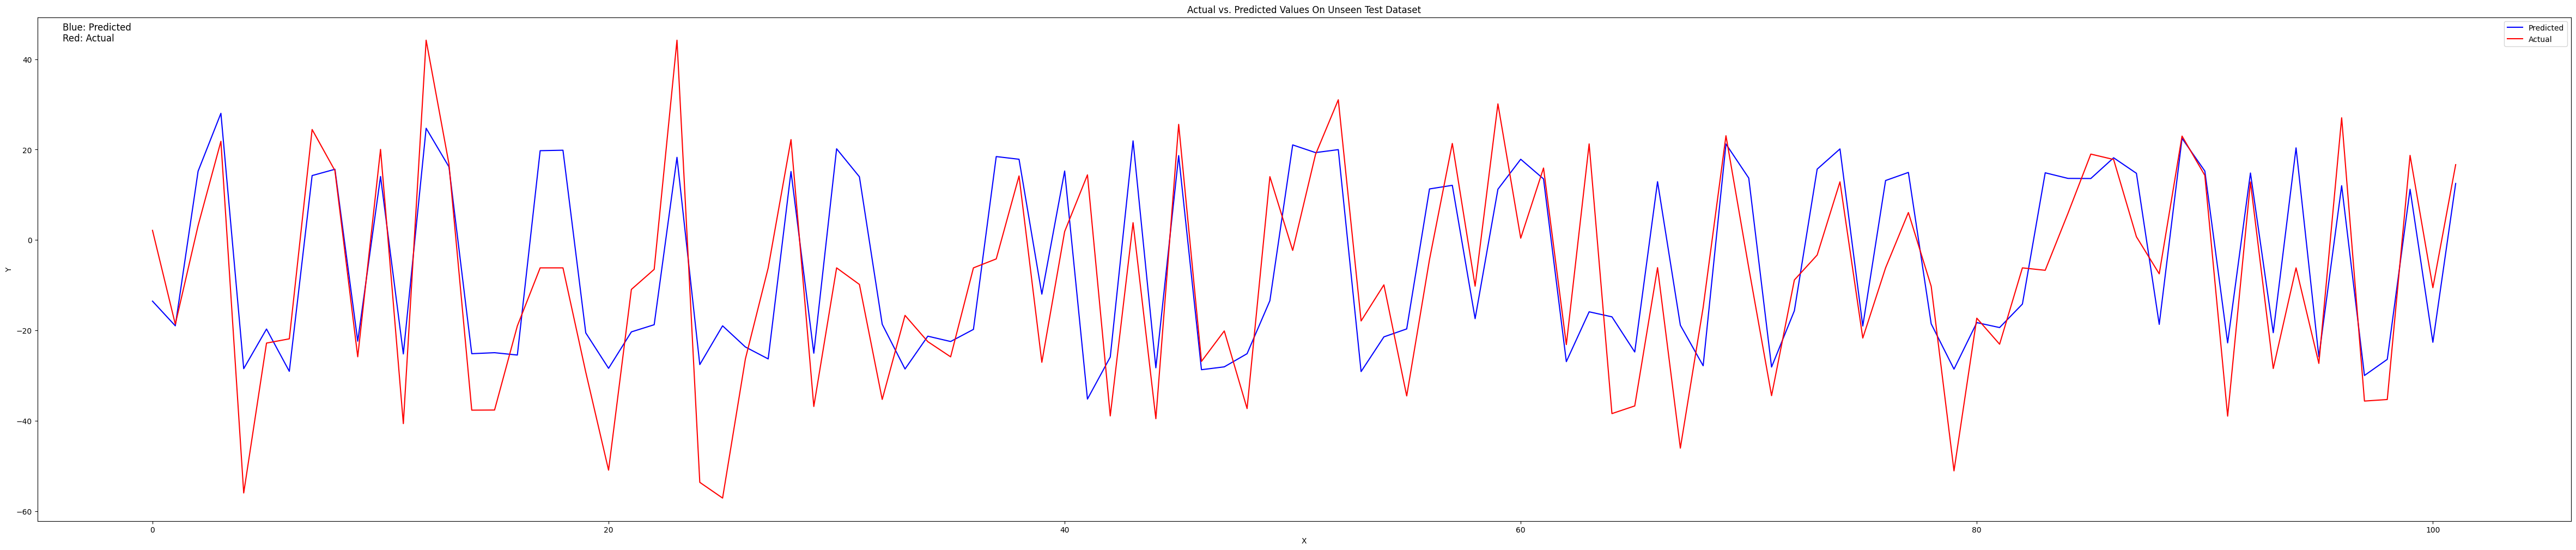

Training Metrics:
MAE: 11.612579369452583
MSE: 275.06385022311053
R2: 0.5539519757847873

Testing Metrics:
MAE: 12.516837659685587
MSE: 243.08443717736844
R2: 0.5637553417555344



In [20]:
#M-2-b -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_avg_distance(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop(['Y_Actual_no_of_towers', 'Y_Actual_avg_distance'], axis=1)
y = df['Y_Actual_avg_distance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define the model
model_svr_sm2 = SVR(kernel='linear')
# Train the support vector regression model
model_svr_sm2.fit(X_train, y_train)

# Prediction of model on test data
y_predict = model_svr_sm2.predict(X_test)

# Plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test Dataset')
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         #used to specify the coordinate system for positioning elements such as text or annotations within a plot
         transform=plt.gca().transAxes)  #gca = "Get Current Axes"

plt.legend()
plt.show()

# Calculate metrics
y_train_pred = model_svr_sm2.predict(X_train)
y_test_pred = model_svr_sm2.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model shows consistent performance on both training and testing data, with similar MAE and R2 scores, suggesting good generalization and balanced fit without significant overfitting. 

In [21]:
#Example
X_new = pd.DataFrame({'time_segment': [2],
 'dt': [0.097727],
 'db': [-13.903409],
 'freq': [1506.0],
 'day_or_night':[1.0],
 'band': [40.0],
 'power':[12.0]})

y_pred_linear = model_regression_sm1.predict(X_new)
y_pred_svr = model_svr_sm1.predict(X_new)
print(y_pred_linear , y_pred_svr)


#The example shows that the two regression models (model_regression_sm1 for linear regression and model_svr_sm1 for SVR) provide different predictions for the same new data point.

[-1.93042125] [9.90854909]


# **ML_Model-3 Decision Tree Regression Model**

**A- for Y_Actual_no_of_towers(%)**

Training Metrics:
MAE: 0.0
MSE: 0.0
R2: 1.0

Testing Metrics:
MAE: 33.881448599431515
MSE: 1985.9364613309356
R2: -0.03471677111224247



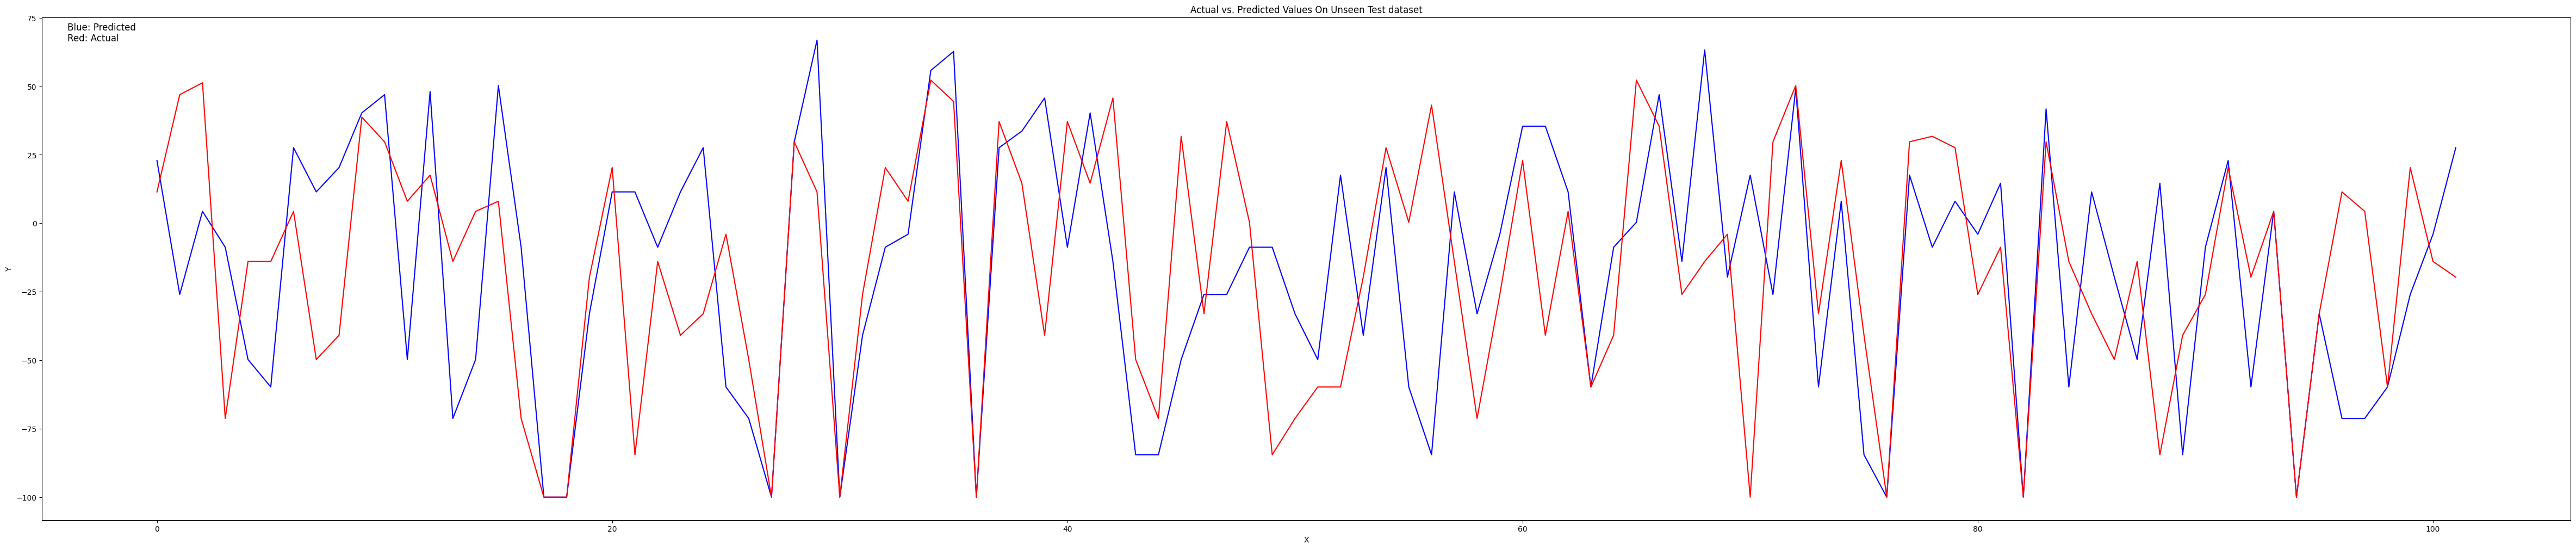

In [22]:
#M-3-a -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_no_of_towers(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance' , axis=1)
y = df['Y_Actual_no_of_towers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regression model
model_tree_sm1 = DecisionTreeRegressor(random_state=42)
#training the model
model_tree_sm1.fit(X_train, y_train)

#prediction of model on test data (X_Test , Y_Test)
y_predict = model_tree_sm1.predict(X_test)

# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test dataset')
#plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
#ploting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = model_tree_sm1.predict(X_train)
y_test_pred = model_tree_sm1.predict(X_test)

#Calculation of matrices
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model is highly overfitted, performing perfectly on training data but failing to generalize to testing data, as evidenced by the high errors and negative R-squared value on the test set.

**B- for Y_Actual_avg_distance(%)**

Training Metrics:
MAE: 0.0
MSE: 0.0
R2: 1.0

Testing Metrics:
MAE: 14.561086563012001
MSE: 337.9293337970495
R2: 0.39354461172062727



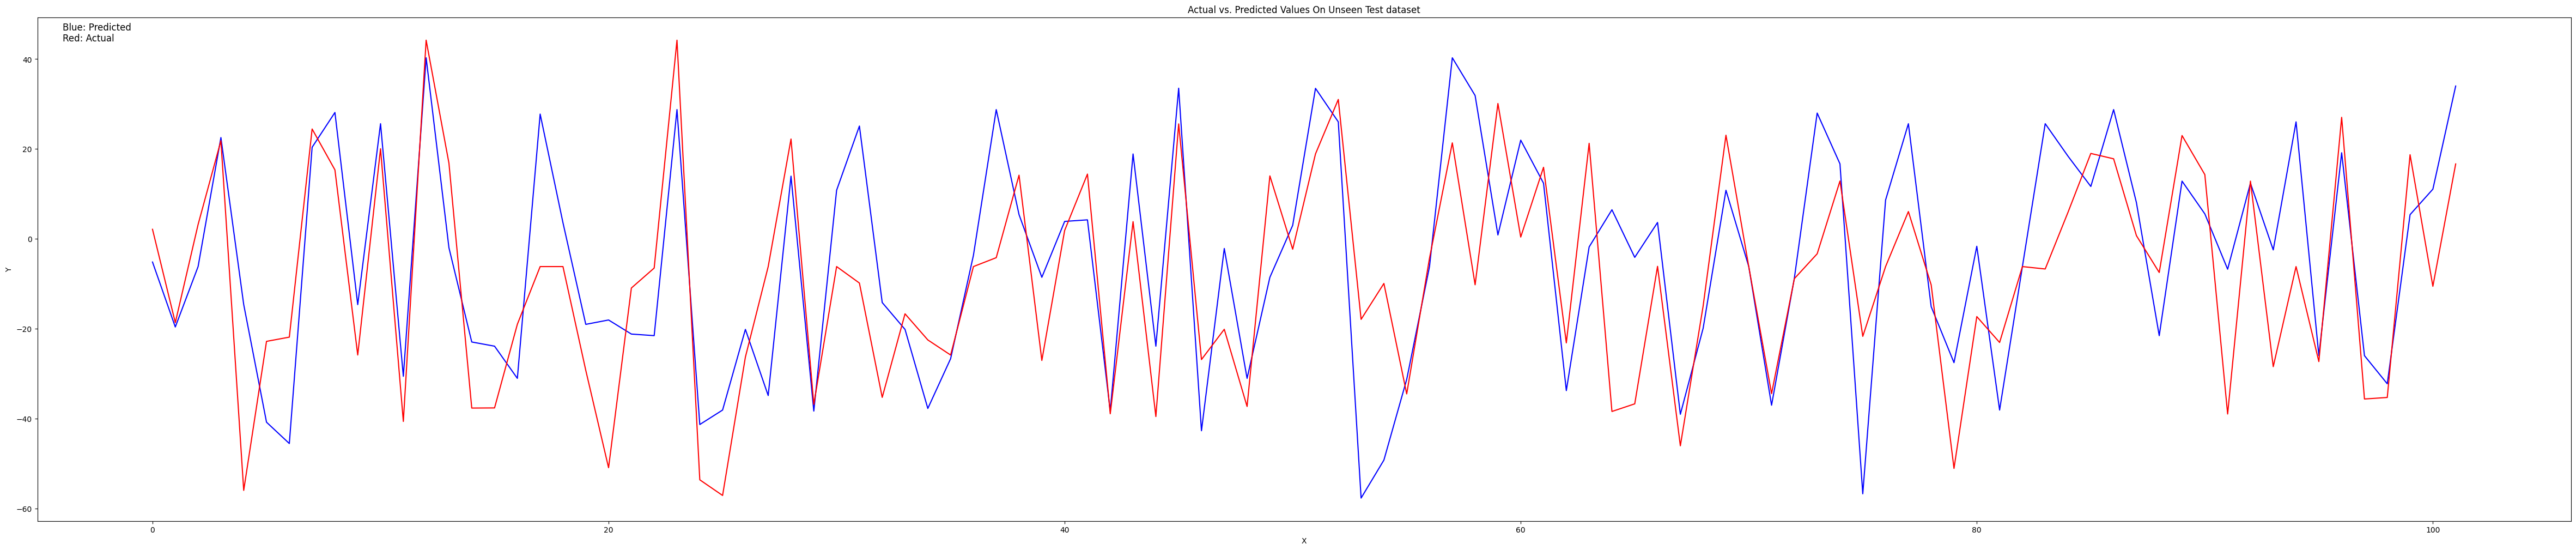

In [23]:
#M-3-b -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_avg_distance(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance' , axis=1)
y = df['Y_Actual_avg_distance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regression model
model_tree_sm2 = DecisionTreeRegressor(random_state=42)
#training the model
model_tree_sm2.fit(X_train, y_train)

#prediction of model on test data (X_Test , Y_Test)
y_predict = model_tree_sm2.predict(X_test)

# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test dataset')
#plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
#ploting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = model_tree_sm2.predict(X_train)
y_test_pred = model_tree_sm2.predict(X_test)

#Calculation of matrices
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model is highly overfitted, showing perfect performance on the training data but significantly reduced generalization to the testing data, as evidenced by the higher errors and lower R-squared value on the test set.

# **ML_Model-4 Random Forest Regression Model**

**A- for Y_Actual_no_of_towers(%)**

Training Metrics:
MAE: 11.205266023236922
MSE: 188.06529058840493
R2: 0.8959630505279128

Testing Metrics:
MAE: 27.520397486551698
MSE: 1072.6865620753651
R2: 0.4411066025837187



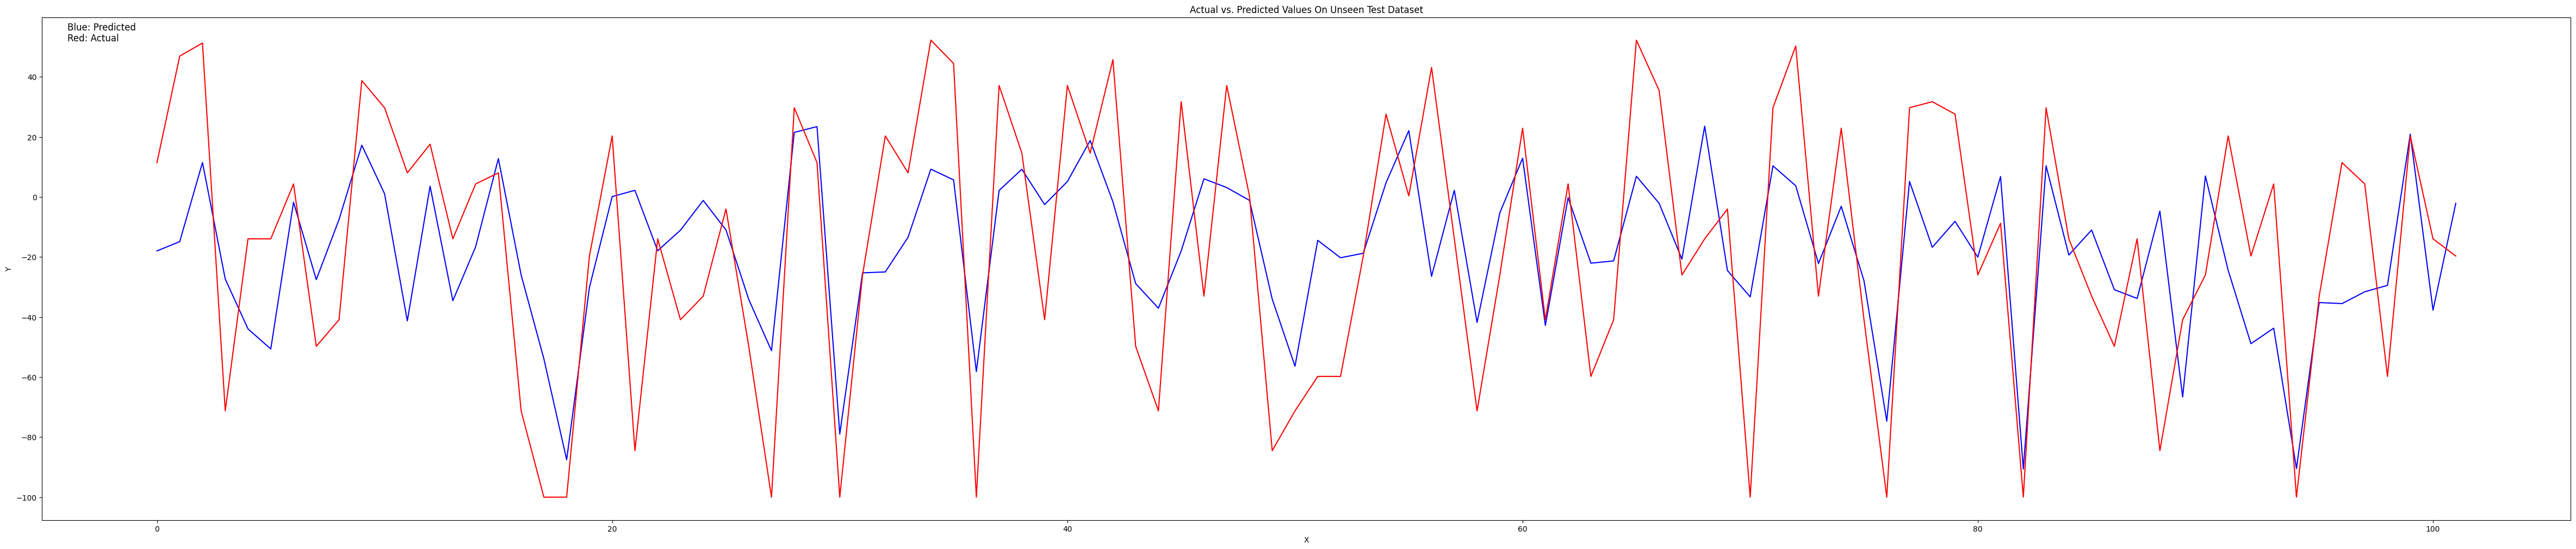

In [24]:
#M-4-a -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_no_of_towers(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance', axis=1)
y = df['Y_Actual_no_of_towers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model_rf_sm1 = RandomForestRegressor(random_state=42)
# training the model
model_rf_sm1.fit(X_train, y_train)

# prediction of model on test data (X_Test, Y_Test)
y_predict = model_rf_sm1.predict(X_test)

# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test Dataset')
# plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
# plotting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = model_rf_sm1.predict(X_train)
y_test_pred = model_rf_sm1.predict(X_test)

# Calculation of metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model demonstrates a good fit on the training data but shows reduced accuracy and higher errors on the testing data, indicating that while the model performs well on known data, its generalization to new data is less effective. This suggests potential overfitting

**B- for Y_Actual_avg_distance(%)**

Training Metrics:
MAE: 4.388074964017087
MSE: 35.873538635432396
R2: 0.9418268848597746

Testing Metrics:
MAE: 11.544335594469974
MSE: 206.539074876528
R2: 0.6293404498458463



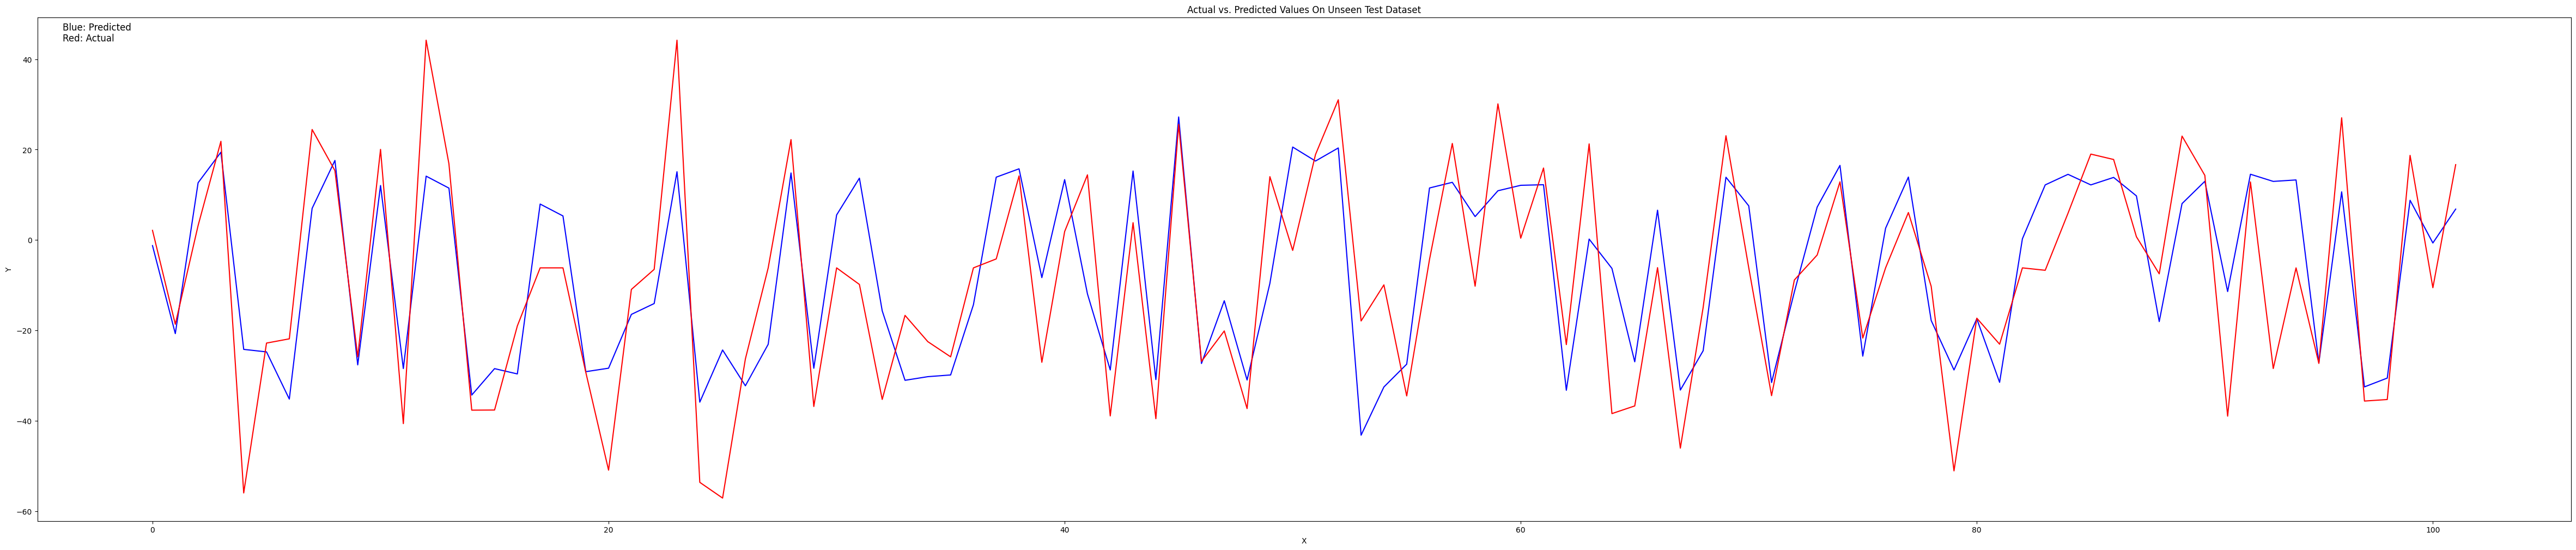

In [25]:
#M-4-b -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_avg_distance(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance', axis=1)
y = df['Y_Actual_avg_distance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model_rf_sm2 = RandomForestRegressor(random_state=42)
# training the model
model_rf_sm2.fit(X_train, y_train)

# prediction of model on test data (X_Test, Y_Test)
y_predict = model_rf_sm2.predict(X_test)

# plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test Dataset')
# plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
# plotting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = model_rf_sm2.predict(X_train)
y_test_pred = model_rf_sm2.predict(X_test)

# Calculation of metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model performs well on both training and testing data, with low error metrics and high R-squared values, indicating effective learning and good generalization, though there is some increase in error when moving from training to testing data, which is expected.

# **ML_Model-5 K-Nearest Neighbour Regression Model**

**A- for Y_Actual_no_of_towers(%)**

Training Metrics:
MAE: 30.071867975179885
MSE: 1353.212669868916
R2: 0.2514082863474405

Testing Metrics:
MAE: 36.3861592466934
MSE: 2025.3349119273066
R2: -0.055244234292298744



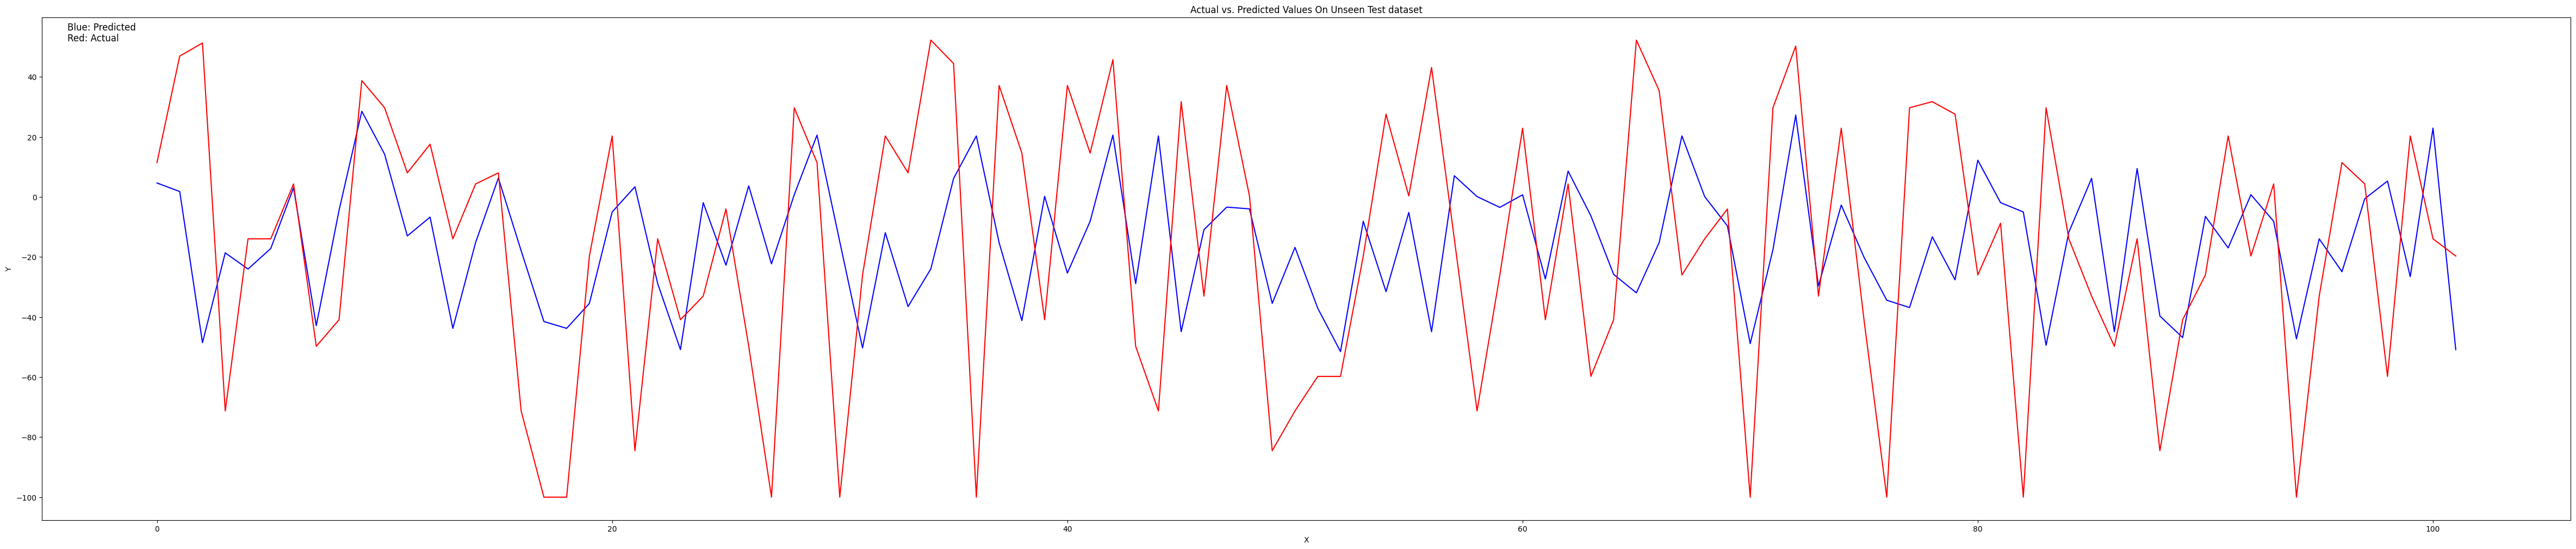

In [26]:
#M-5-a -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_no_of_towers(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance', axis=1)
y = df['Y_Actual_no_of_towers']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbor Regression model
knn_model_sm1 = KNeighborsRegressor(n_neighbors=5)
# Training the model
knn_model_sm1.fit(X_train, y_train)

# Prediction of model on test data (X_Test, Y_Test)
y_predict = knn_model_sm1.predict(X_test)

# Plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test dataset')
# Plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
# Plotting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = knn_model_sm1.predict(X_train)
y_test_pred = knn_model_sm1.predict(X_test)

# Calculation of matrices
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model exhibits poor performance on both training and testing data, with high error metrics and very low (even negative) R-squared values, indicating that it fails to capture the underlying patterns in the data and generalize effectively.

**B- for Y_Actual_average_distance(%)**

Training Metrics:
MAE: 11.643146225862992
MSE: 231.56064553247754
R2: 0.6244974817956548

Testing Metrics:
MAE: 13.352065870963651
MSE: 315.52385632401865
R2: 0.43375397261811055



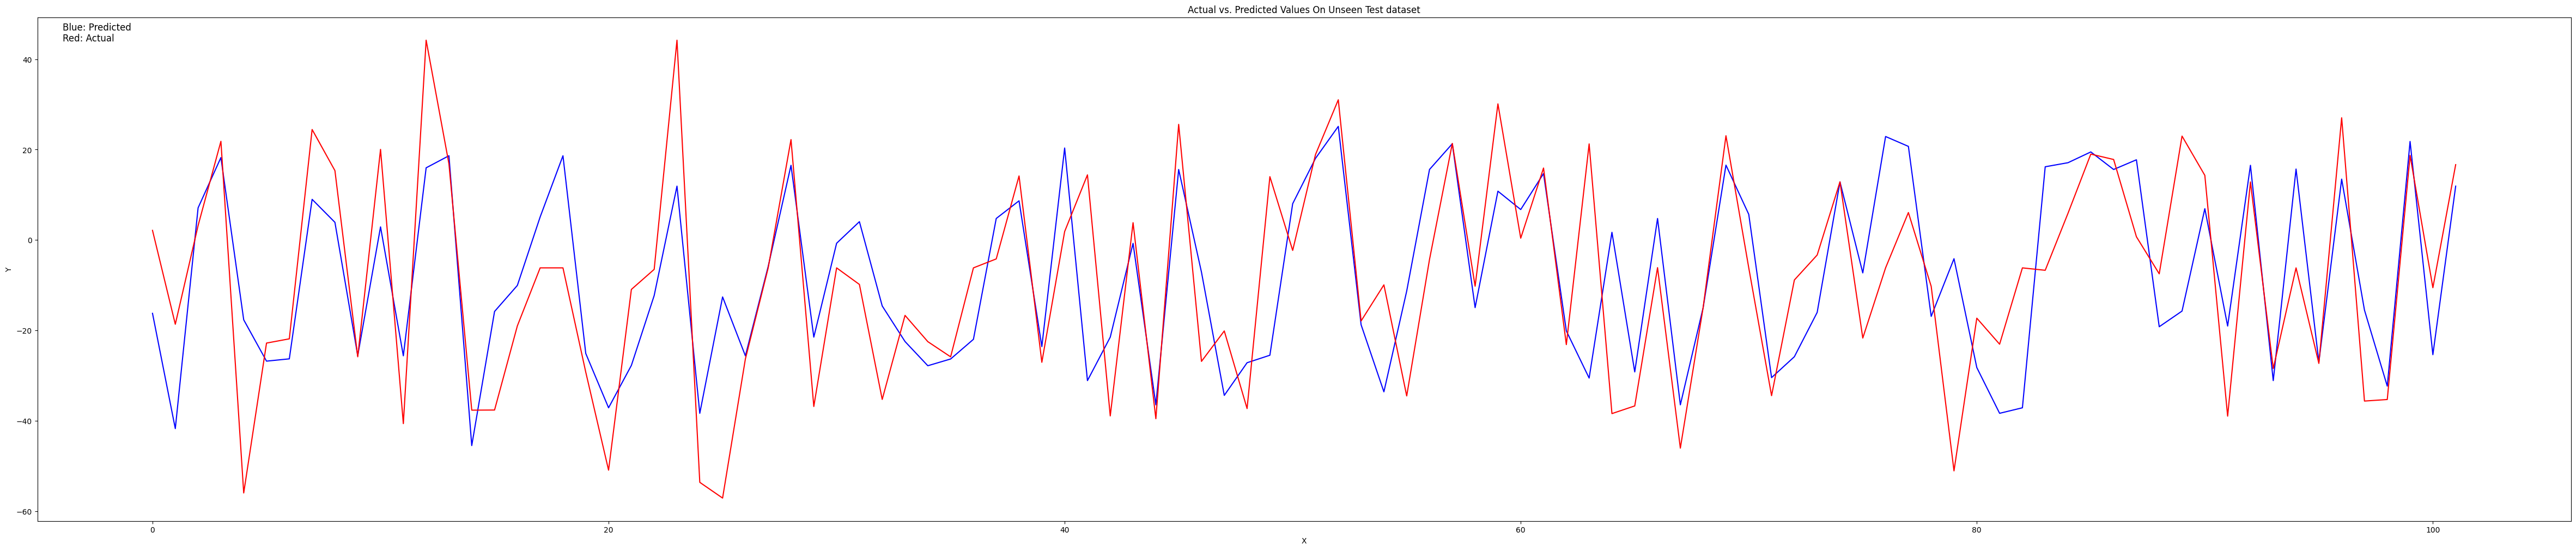

In [27]:
#M-5-b -> (time_segment,dt,db,freq,day_or_night,band,power) -> Y_Actual_average_distance(%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load dataset
df = df_dataset

# Replace NaNs with column averages
df.fillna(df.mean(), inplace=True)

# Split the dataset into features (X) and target (y)
X = df.drop('Y_Actual_no_of_towers', axis=1)
X = X.drop('Y_Actual_avg_distance', axis=1)
y = df['Y_Actual_avg_distance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the K-Nearest Neighbor Regression model
knn_model_sm2 = KNeighborsRegressor(n_neighbors=5)
# Training the model
knn_model_sm2.fit(X_train, y_train)

# Prediction of model on test data (X_Test, Y_Test)
y_predict = knn_model_sm2.predict(X_test)

# Plotting predict vs actual
plt.figure(figsize=(60, 12))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values On Unseen Test dataset')
# Plotting y_pred
plt.plot(range(len(y_predict)), y_predict, color='blue', label='Predicted')
# Plotting y_test
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Add text annotations in the top-left corner
plt.text(0.01, 0.99, 'Blue: Predicted\nRed: Actual', 
         color='black', fontsize=12, 
         ha='left', va='top', 
         transform=plt.gca().transAxes)

# Calculate metrics
y_train_pred = knn_model_sm2.predict(X_train)
y_test_pred = knn_model_sm2.predict(X_test)

# Calculation of matrices
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"R2: {r2_train}\n")

print("Testing Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"R2: {r2_test}\n")


The model shows a moderate fit with reasonable performance on both training and testing data, with slightly higher errors and lower R-squared values on the test set, suggesting that while the model generalizes fairly well, there is room for improvement in capturing the underlying patterns in the data.